# k-means clustering

In [2]:
using Clustering
using VegaLite
using VegaDatasets
using DataFrames
using Statistics
using JSON
using XLSX
using Distances

In [2]:
per_bulan = DataFrame(XLSX.readtable("Data_4.xlsx","Per Bulan")...)

,BulanKe,Bulan,Rata-Rata Suhu,TotalCurahHujan,Rata-Rata Kelembaban,Rata-Rata Kecepatan Angin
,Any,Any,Any,Any,Any,Any
1,1,Januari,27.2487,198.5,83.3859,22.4701
2,2,Februari,27.4815,251.0,84.4934,10.6694
3,3,Maret,27.2969,290.3,83.2613,14.7434
4,4,April,27.8725,303.9,83.8413,9.872
5,5,Mei,28.2246,83.4,79.8852,11.1538
6,6,Juni,28.2691,12.5,74.0459,8.40279
7,7,Juli,27.6997,16.2,71.6176,11.739
8,8,Agustus,27.7423,15.1,69.3392,9.49442
9,9,September,28.0694,2.0,69.6607,11.653


In [3]:
curah_hujan=Float64.(per_bulan[!, 4])
cluster2 = kmeans(curah_hujan', 2)
insertcols!(per_bulan,5,:Cluster=>cluster2.assignments)

,BulanKe,Bulan,Rata-Rata Suhu,TotalCurahHujan,Cluster,Rata-Rata Kelembaban
,Any,Any,Any,Any,Int64,Any
1,1,Januari,27.2487,198.5,2,83.3859
2,2,Februari,27.4815,251.0,2,84.4934
3,3,Maret,27.2969,290.3,2,83.2613
4,4,April,27.8725,303.9,2,83.8413
5,5,Mei,28.2246,83.4,1,79.8852
6,6,Juni,28.2691,12.5,1,74.0459
7,7,Juli,27.6997,16.2,1,71.6176
8,8,Agustus,27.7423,15.1,1,69.3392
9,9,September,28.0694,2.0,1,69.6607


# k-medoids clustering

In [6]:
xmatrix = curah_hujan'
D = pairwise(Euclidean(), xmatrix, xmatrix,dims=2) 

K = kmedoids(D,2)
insertcols!(per_bulan,6,:medoids_clusters=>K.assignments)

,BulanKe,Bulan,Rata-Rata Suhu,TotalCurahHujan,Cluster,medoids_clusters
,Any,Any,Any,Any,Int64,Int64
1,1,Januari,27.2487,198.5,2,2
2,2,Februari,27.4815,251.0,2,2
3,3,Maret,27.2969,290.3,2,2
4,4,April,27.8725,303.9,2,2
5,5,Mei,28.2246,83.4,1,1
6,6,Juni,28.2691,12.5,1,1
7,7,Juli,27.6997,16.2,1,1
8,8,Agustus,27.7423,15.1,1,1
9,9,September,28.0694,2.0,1,1


# Visualisasi menggunakan vlplot point

In [7]:
hasil = DataFrame(XLSX.readtable("Data_4.xlsx","Hasil")...)

,BulanKe,Bulan,TotalCurahHujan,Pengelompokan
,Any,Any,Any,Any
1,1,Januari,198.5,klaster 2
2,2,Februari,251.0,klaster 2
3,3,Maret,290.3,klaster 2
4,4,April,303.9,klaster 2
5,5,Mei,83.4,klaster 1
6,6,Juni,12.5,klaster 1
7,7,Juli,16.2,klaster 1
8,8,Agustus,15.1,klaster 1
9,9,September,2.0,klaster 1


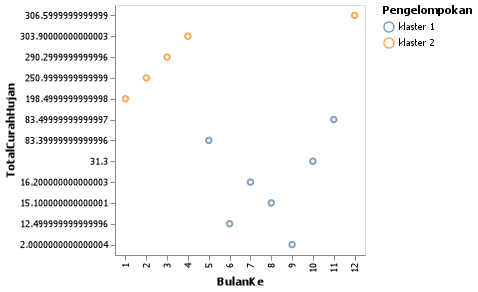

In [13]:
hasil |>
@vlplot(
    :point,
    x=:BulanKe,
    y={:TotalCurahHujan,sort="descending"},
    color=:Pengelompokan,
    width=250,
    height=250
)